## Vector Fields

Vector Glyphs

A wind field where wind blows mostly to the right (eastward) with small vertical variation — as in airflow over a flat landscape.

use `plt.quiver`  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

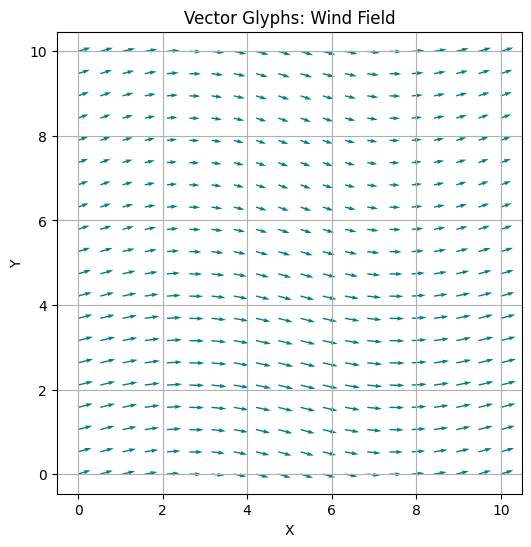

In [5]:
# Create a grid
x, y = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))

# Define a simple wind field
u = 1 + 0.2 * np.sin(np.pi * y / 5)  # Horizontal component
v = 0.3 * np.cos(np.pi * x / 5)      # Vertical oscillation

# Plot vector glyphs
plt.figure(figsize=(6, 6))
plt.quiver(x, y, u, v, color='teal')
plt.title("Vector Glyphs: Wind Field")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()


**Analysis**
- Arrows show both direction and magnitude.
- Eastward flow is dominant.
- Slight vertical variation is shown by wavy arrow angles.
- Useful for local, point-wise inspection, but gets cluttered in dense or 3D fields.
---

Streamlines

Ssame wind field, showing flow continuity rather than pointwise arrows.

use `plt.streamplot`


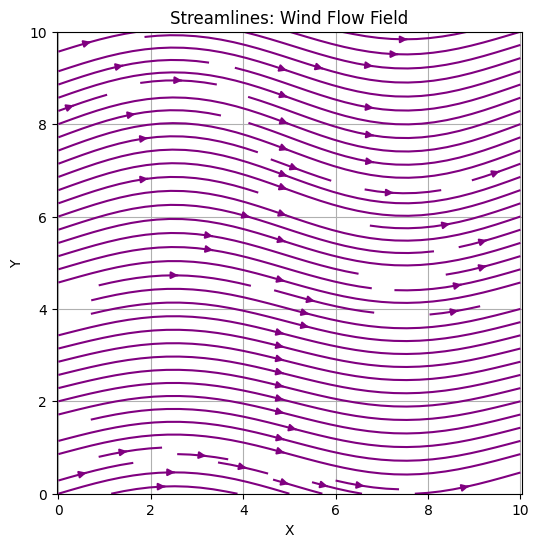

In [6]:
# Use same grid and vector field
x, y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
u = 1 + 0.2 * np.sin(np.pi * y / 5)
v = 0.3 * np.cos(np.pi * x / 5)

# Streamplot
plt.figure(figsize=(6, 6))
plt.streamplot(x, y, u, v, color='purple', density=1.2)
plt.title("Streamlines: Wind Flow Field")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.grid(True)
plt.show()

**Analysis**
- Shows complete flow paths as continuous lines.
- Clearer pattern recognition than quivers.
- Can identify circulation zones and global flow behavior.
- Doesn’t visualize vector magnitude unless colored.

---

Stream Tubes

Helical air flow rising through a vertical cylinder — like air swirling up a chimney or thermal vortex.

use `plotly.graph_objects` as `go.Figure with data = StreamTube`



In [8]:
# 3D Grid
x, y, z = np.meshgrid(
    np.linspace(-1, 1, 8),
    np.linspace(-1, 1, 8),
    np.linspace(0, 2, 8)
)

# Vector field for rising spiral
u = -y
v = x
w = 1 + 0.2 * z

# Streamtube plot
fig = go.Figure(data=go.Streamtube(
    x=x.flatten(), y=y.flatten(), z=z.flatten(),
    u=u.flatten(), v=v.flatten(), w=w.flatten(),
    colorscale='Viridis',
    sizeref=0.3,
    showscale=True
))
fig.update_layout(
    title='Stream Tubes: Rising Spiral Flow',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z (Height)'
    )
)
fig.show()


**Analysis**
- Tubes clearly show 3D structure of flow.
- Flow rises and spirals, resembling vortex columns.
- Color encodes speed — darker = slower, lighter  = faster.
- Great for volumetric flow visualization in physics, meteorology, or CFD.

---


Stream Ribbons

Visualize twisting air around a central axis — like airflow around a tall chimney or vortex sheddin


use `fig = go.Figure()` with adding a offset to tube

In [9]:
# Offset vector fields for a ribbon effect
epsilon = 0.1
x2, y2 = x + epsilon, y + epsilon
z2 = z

u2 = -y2
v2 = x2
w2 = 1 + 0.2 * z2

fig = go.Figure()

# Streamtube 1
fig.add_trace(go.Streamtube(
    x=x.flatten(), y=y.flatten(), z=z.flatten(),
    u=u.flatten(), v=v.flatten(), w=w.flatten(),
    colorscale='Cividis',
    sizeref=0.3,
    showscale=False
))

# Streamtube 2 (offset)
fig.add_trace(go.Streamtube(
    x=x2.flatten(), y=y2.flatten(), z=z2.flatten(),
    u=u2.flatten(), v=v2.flatten(), w=w2.flatten(),
    colorscale='Plasma',
    sizeref=0.3,
    showscale=False
))

fig.update_layout(
    title='Simulated Stream Ribbons (Twisting Flows)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()

**Analysis**
- Two parallel streamtubes create a ribbon illusion.
Shows flow twist and vorticity.
- Useful when native ribbon rendering is unavailable.
- Can simulate shear or rotational flow structures in airflow or fluid streams.
